# Introduction

In the last tab, we are familiar with clustering algorithms such as K-Means, HAC, or DBSCAN to unearth patterns behind the numerical data. However, clustering is not the only unsupervised way to find similarities between data points. You can also use association rule learning techniques to determine if certain data points (actions) are more likely to occur together.

A simple example of association rule is supermarket analysis. If someone is buying a diaper, he is more likely to purchase a beer. Such combined purchase behaviors does not appear at once. Therefore, Association rule can be  leveraged to analyze financial transactions, purchase behaviors online and local supermarkets, and even for the pure text data.

In this part, I use Apriori algorithm to analyze the hate speech tweets that involve sexism or racism, trying to dig specific patterns of hate speech. In such senses, such patterns can be used to predict the hate speech.


In [2]:
import pandas as pd
from nltk.tokenize import word_tokenize
from apyori import apriori
import networkx as nx 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [24]:
# read the data
df=pd.read_csv("../../data/hate_speech.csv",index_col=0)
df=df[df["label"]==1]
df.reset_index(drop=True,inplace=True)
df.text = df.text.fillna('')
df[~df.text.isnull()]
df.text = df.text.str.replace('rt','')
df.text = df.text.str.replace('mkr','')
df.text = df.text.str.replace('kat','')
df.text = df.text.str.replace('im','')
df.text = df.text.str.split()
df.head()

# Build the Function

In [6]:
def reformat_results(results):

    keep =[]
    for i in range(0, len(results)):
        for j in range(0, len(list(results[i]))):
            if (j>1):
                for k in range(0, len(list(results[i][j]))):
                    if (len(results[i][j][k][0]) != 0):
                        rhs = list(results[i][j][k][0])
                        lhs = list(results[i][j][k][1])
                        conf = float(results[i][j][k][2])
                        lift = float(results[i][j][k][3])
                        keep.append([rhs,lhs,supp,conf,supp*conf,lift])
            if (j==1):
                supp = results[i][j]

    return pd.DataFrame(keep, columns =["rhs","lhs","supp","conf","supp x conf","lift"])

def convert_to_network(df):
    print(df)

    #BUILD GRAPH
    G = nx.DiGraph()  # DIRECTED
    for row in df.iterrows():
        # for column in df.columns:
        lhs="_".join(row[1][0])
        rhs="_".join(row[1][1])
        conf=row[1][3]; #print(conf)
        if(lhs not in G.nodes): 
            G.add_node(lhs)
        if(rhs not in G.nodes): 
            G.add_node(rhs)

        edge=(lhs,rhs)
        if edge not in G.edges:
            G.add_edge(lhs, rhs, weight=conf)
    return G

def plot_network(G):
    #SPECIFIY X-Y POSITIONS FOR PLOTTING
    pos=nx.random_layout(G)

    #GENERATE PLOT
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)

    #assign colors based on attributes
    weights_e   = [G[u][v]['weight'] for u,v in G.edges()]

    #SAMPLE CMAP FOR COLORS 
    cmap=plt.cm.get_cmap('Blues')
    colors_e    = [cmap(G[u][v]['weight']*10) for u,v in G.edges()]

    #PLOT
    nx.draw(
    G,
    edgecolors="black",
    edge_color=colors_e,
    node_size=2000,
    linewidths=2,
    font_size=8,
    font_color="white",
    font_weight="bold",
    width=weights_e,
    with_labels=True,
    pos=pos,
    ax=ax
    )
    ax.set(title='Account Description of Users Sending rumors')
    plt.show()


# Model Building

In [23]:
results = list(apriori(df.text, min_support=0.01, min_confidence=0.1, min_length=3, max_length=2))
pd_results = reformat_results(results)
G = convert_to_network(pd_results)

            rhs          lhs      supp      conf  supp x conf       lift
0        [call]     [sexist]  0.039691  0.900000     0.035722   5.101875
1      [sexist]       [call]  0.039691  0.225000     0.008931   5.101875
2        [call]      [woman]  0.018743  0.425000     0.007966   2.942557
3       [woman]       [call]  0.018743  0.129771     0.002432   2.942557
4      [driver]      [woman]  0.011025  0.833333     0.009188   5.769720
5      [female]     [sexist]  0.028666  0.742857     0.021295   4.211071
6      [sexist]     [female]  0.028666  0.162500     0.004658   4.211071
7    [football]     [sexist]  0.013230  0.800000     0.010584   4.535000
8         [get]     [sexist]  0.011025  0.188679     0.002080   1.069575
9        [girl]     [sexist]  0.026461  0.363636     0.009622   2.061364
10     [sexist]       [girl]  0.026461  0.150000     0.003969   2.061364
11         [ie]      [nikki]  0.011025  0.833333     0.009188  62.986111
12      [nikki]         [ie]  0.011025  0.833333   

# Data Visualization

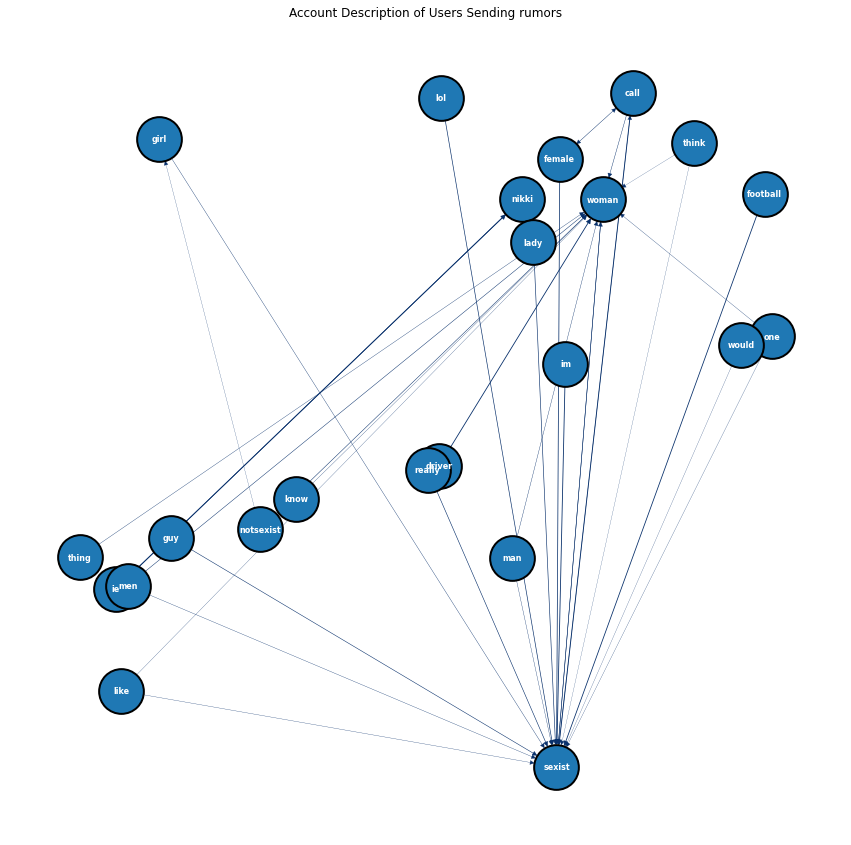

In [58]:
plot_network(G)

# Results

Setting a minimum of support and confidence, we can get a straightforward combination of frequent words.
Above all, the word "sexist" can't be ignored, since it represents some prejudice over the gender-related issues. Moreover, if we take a closer look, "woman" and "sexist" are highly correlated. 

Sexism in a society is most commonly applied against women and girls. And this leads to a broader picture. If woman and sexist are both observed on Tweets, we should tag this tweets as hate speech or not? What if the tweets that contain the two words just want to convey that women should be protected. To some extent, I think a more complex architecture of model is needed, let's say, Bert, to capture more detailed patterns of the text data.

Moreover, the name Nikki is repeatedly mentioned in many texts and related to the topic of sexism. I google the name, and surprisingly notice that Rap artist Nicki Minaj has spoken out against sexism in hip-hop. Thereafter, Nikki is a important feature to classify sexism speech.

# Conclusion 

Association rule model called Apriori algorithm has been applied to detect text patterns. The limitation of the results is that because of the imblance between the sexism and racism text in the hate speech, many patterns only relate to the sexism. Problem of how to detect the racism is still remained if only use association rule.

# Reference

[1] Dobilas, S. (2022, May 9). Apriori algorithm for Association Rule learning - how to find clear links between transactions. Medium. Retrieved December 8, 2022, from https://towardsdatascience.com/apriori-algorithm-for-association-rule-learning-how-to-find-clear-links-between-transactions-bf7ebc22cf0a 